In [1]:
using ComputationalHeatTransfer

In [2]:
using Plots
using LaTeXStrings

Note: All temperatures here represent $T - T_0$, where $T_0$ is the undisturbed temperature of the plate. 

### Physical parameters

In [66]:
ρ = 1;
c = 1;
k = 0.1;
d = 0.1;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(1.0, 1.0, 0.1, 0.1, 0.1)

In [67]:
xlim = (-2.0,2.0)
ylim = (-2.0,2.0)
Δx, Δt = setstepsizes(params.α,gridPe=0.1,fourier=200.0)

(0.010000000000000002, 0.02000000000000001)

### Set up the evaporator and condenser

In [68]:
eb = Rectangle(0.5,0.5,1.5*Δx)
Te = RigidTransform((-0.5,0.5),0.0)
Te(eb)
cb = Rectangle(0.5,0.2,1.5*Δx)
Tc = RigidTransform((0.5,-0.5),0.0)
Tc(cb)

qe = 10.0
hc = 10.0
Tc = -50.0

eparams = PrescribedHeatFluxRegion(qe,eb);
cparams = PrescribedHeatModelRegion(hc,Tc,cb);

### Set up the OHP

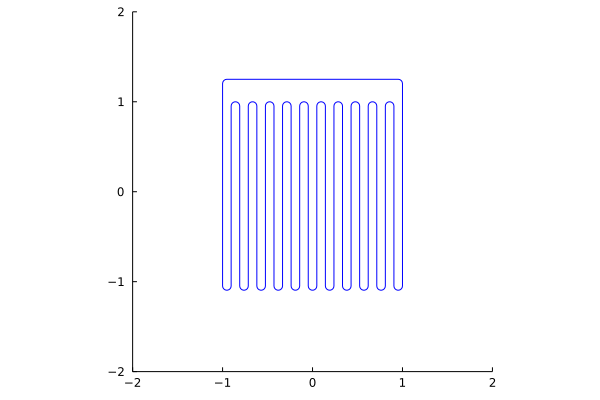

In [69]:
ds = 1.5Δx
nturn = 10
#pitch = 0.125
length = 2.0
height = 2.0
gap = 0.25
pitch = length/(2*nturn+1)
x0, y0 = -length/2, 1.25
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,0.0)
ohp = BasicBody(x,y)

plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim)

In [70]:
ohpgeom = ComputationalHeatTransfer.LineSourceParams(ohp)
qtmp = zeros(numpts(ohp));

### Create the system

In [71]:
sys = HeatConduction(params,Δx,xlim,ylim,Δt,qflux=eparams,qmodel=cparams,qline=ohpgeom)
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


#### Initialize state, and create the integrator

In [72]:
u0 = newstate(sys)
tspan = (0.0,1.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Primal nodes in a (nx = 416, ny = 416) cell grid of type Float64 data
  Number of Primal nodes: (nx = 415, ny = 415), Float64[])

### Set up values for the OHP heat flux per unit length and advance the solution

In [73]:
fill!(qtmp,-1.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [74]:
step!(integrator,1.0)

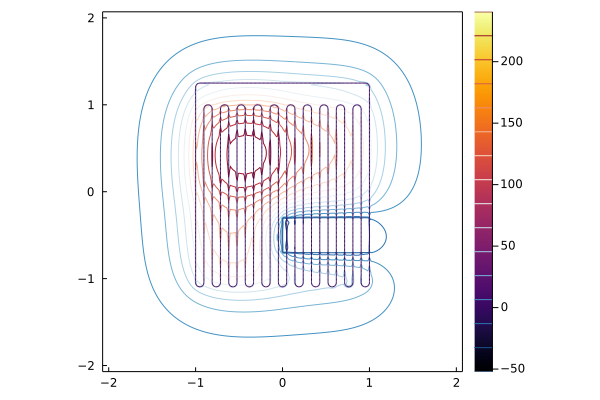

In [75]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(ohp,fillalpha=0,line_z=qtmp)

### Now change the values for the OHP heat flux per unit length and advance further

In [13]:
fill!(qtmp,-10.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [14]:
step!(integrator,1.0)

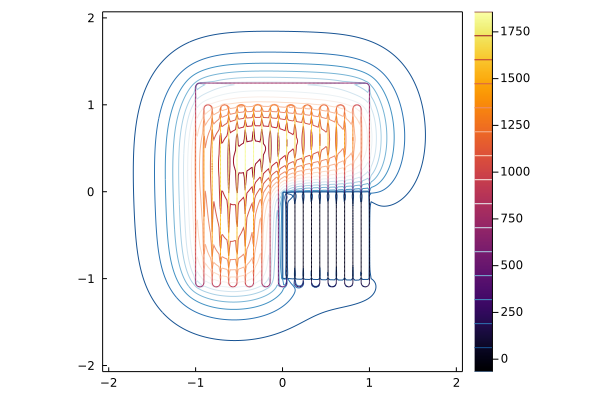

In [15]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

### Plot the temperature along the OHP channel

In [16]:
temperature(integrator)

Nodes{Primal,416,416,Float64,Array{Float64,2}} data
Printing in grid orientation (lower left is (1,1))
415×415 Array{Float64,2}:
 0.0356004  0.0439216  0.0529447  0.0625239  …   0.0372662    0.0302019
 0.0438783  0.0541353  0.0652578  0.0770657      0.0459303    0.0372224
 0.0528322  0.0651834  0.0785767  0.0927955      0.0553019    0.0448162
 0.0623094  0.076877   0.092674   0.109445       0.065221     0.0528535
 0.0721702  0.0890443  0.107342   0.126769       0.0755415    0.0612161
 0.0823023  0.101546   0.122415   0.14457    …   0.0861458    0.0698084
 0.0926258  0.114285   0.137772   0.162709       0.0969501    0.0785626
 0.103092   0.127199   0.153342   0.181098       0.107903     0.0874373
 0.113676   0.14026    0.169089   0.199698       0.11898      0.0964122
 0.124374   0.153461   0.185004   0.218496       0.130174     0.105482
 0.135188   0.166805   0.201094   0.237501   …   0.14149      0.11465
 0.146127   0.180305   0.217371   0.256728       0.152937     0.123924
 0.157204  

In [17]:
? ohp

search: ohp ohpgeom RosShamp4 promote_shape plots_heatmap plots_heatmap!



No documentation found.

`ohp` is of type `BasicBody{3281,RigidBodyTools.ClosedBody}`.

# Summary

```
mutable struct BasicBody{3281,RigidBodyTools.ClosedBody} <: Body{3281,RigidBodyTools.ClosedBody}
```

# Fields

```
cent :: Tuple{Float64,Float64}
α    :: Float64
x̃   :: Array{Float64,1}
ỹ    :: Array{Float64,1}
x    :: Array{Float64,1}
y    :: Array{Float64,1}
```

# Supertype Hierarchy

```
BasicBody{3281,RigidBodyTools.ClosedBody} <: Body{3281,RigidBodyTools.ClosedBody} <: Any
```


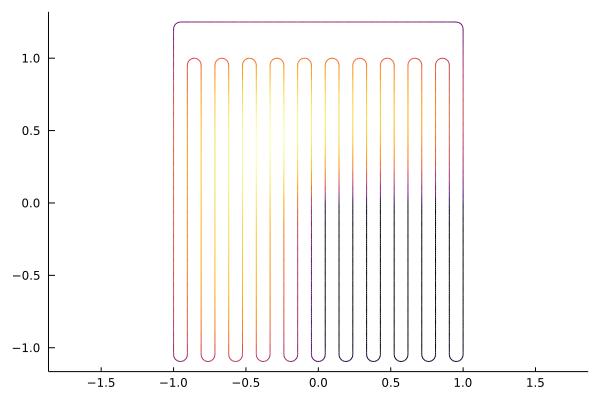

In [18]:
plot(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

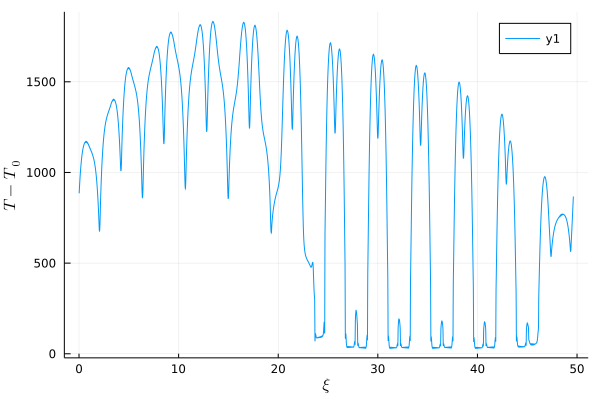

In [19]:
plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")